In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

### Variable Transformation
- Variable Transformation is a process by which -
1) We replace variable with some function of a variable. Example replacing the variable x with its logarithm
2) We change the distribution or relationship of a variable with others



#### Why do we use the Variable Transformation ?
1) Change the scale of a variable. For example-if 10 variables are in 10Km and one in Miles.
2) Transforming non-linear relationships into linear relationships
3) Create Symmetric distributions from skewed distributions, as its easy to interpret the symmetric distribution as compared to skewed ones.



##### Common Methods of Variable Transformations:
1) Logarithm --- Taking Log of the variable reduces right skewness of the variable
2) Square Root --- Used for right skewed variable with positive values only
3) Cube Root --- Used for right skewed variable with negative values
4) Binning --- Used for converting the continuous variables into categorical variables

In [4]:
df=pd.read_csv('data/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


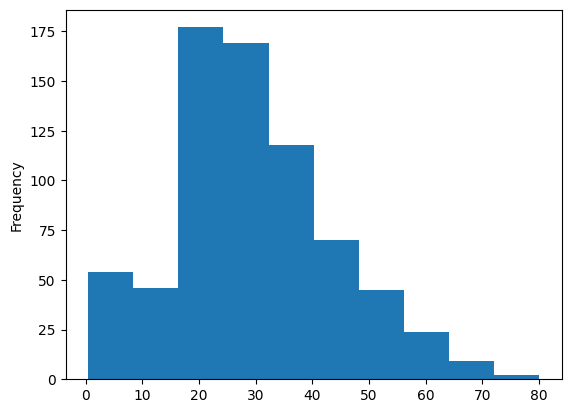

In [6]:
# Lets check the distribution of the age variable first
df['Age'].plot.hist();

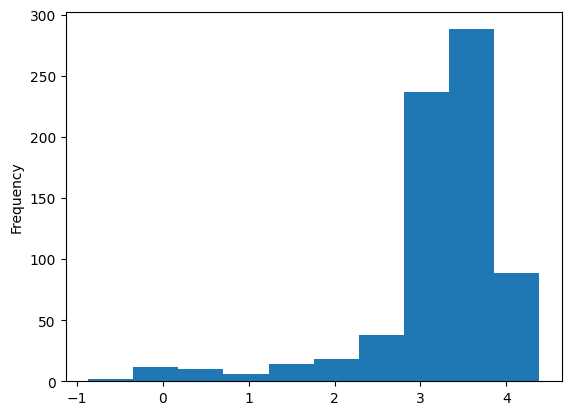

In [8]:
# The above histogram is kind of the right skewed where the majority of the values are concentrated on the lower side, and the rest of the values on the right side
# Lets first use the log transformations
np.log(df['Age']).plot.hist();

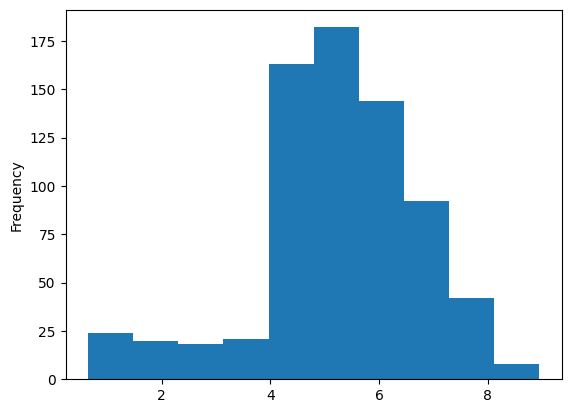

In [9]:
# Using the log transformation, the above figure is converted into the extreme left skewed and the skewness is even more than the original one, so the above doesnt work,now lets try with the square root transformation
np.sqrt(df['Age']).plot.hist();

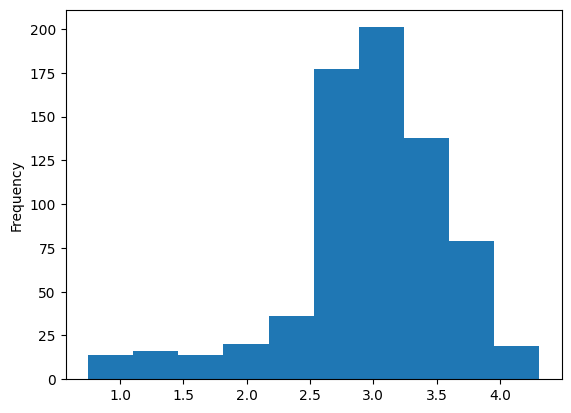

In [11]:
## From the above figure, we can see that the square root is a better transformation that the log transformations as its more symmetric from the above two ones. Now try with the cube transformations
np.cbrt(df['Age']).plot.hist();

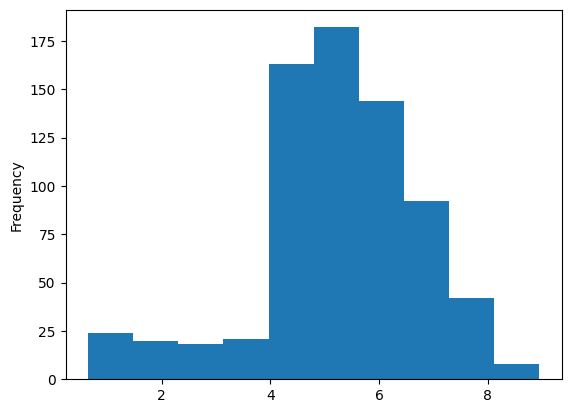

In [12]:
# After comparing the three transformation, we will stick to the square root transformation
np.sqrt(df['Age']).plot.hist();

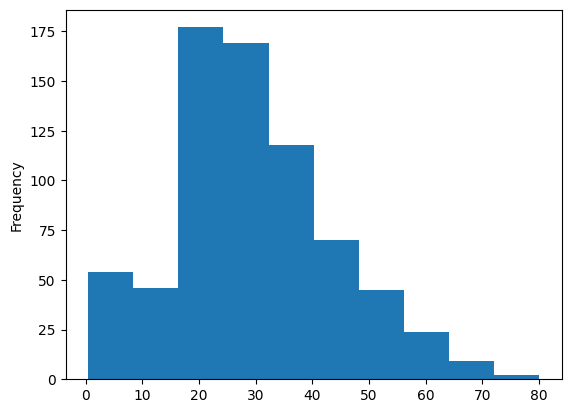

In [13]:
# The last one we will try is binning
df['Age'].plot.hist();

In [16]:
bins=[0,15,80]
# O-15 children, 15-80 will be another group as adult
group=['Children','Adult']

In [17]:
# Now lets create the variable named type. For that we will need the pandas cut age variable and passing the bins and the names

df['type']=pd.cut(df['Age'],bins,labels=group)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [19]:
df['type'].value_counts()

type
Adult       631
Children     83
Name: count, dtype: int64